WAJIHA KHAN (CS-19064)
HAFIZA JAVERIA ADIL (CS-19301)

# COMPLEX ENGINEERING PROJECT

In [1]:
#IMPORTING THE REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import KFold

In [2]:
#LOADING THE DATASET IN THE PROJECT
dataset=pd.read_csv("The_Grades_Dataset.csv")
dataset.info()#INFORMATION ABOUT THE DATA ABOUT HAVING NULL VALUES
dataset.head()#PRINTS UPPER 5 ROWS IN THE DATA 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [3]:
#DECLARING CGPA AS THE OUTPUT
output=dataset.CGPA
output.head()#PRINTS UPPER 5 ROWS IN THE DATA 

0    2.205
1    2.008
2    3.608
3    1.906
4    3.448
Name: CGPA, dtype: float64

In [4]:
#SEPARATING INPUT AND OUTPUT FEATURES

courses=dataset.drop(['CGPA','Seat No.'],axis="columns")


In [5]:
courses.info()#INFORMATION ABOUT THE DATA ABOUT HAVING NULL VALUES

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 41 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   PH-121     571 non-null    object
 1   HS-101     571 non-null    object
 2   CY-105     570 non-null    object
 3   HS-105/12  570 non-null    object
 4   MT-111     569 non-null    object
 5   CS-105     571 non-null    object
 6   CS-106     569 non-null    object
 7   EL-102     569 non-null    object
 8   EE-119     569 non-null    object
 9   ME-107     569 non-null    object
 10  CS-107     569 non-null    object
 11  HS-205/20  566 non-null    object
 12  MT-222     566 non-null    object
 13  EE-222     564 non-null    object
 14  MT-224     564 non-null    object
 15  CS-210     564 non-null    object
 16  CS-211     566 non-null    object
 17  CS-203     566 non-null    object
 18  CS-214     565 non-null    object
 19  EE-217     565 non-null    object
 20  CS-212     565 non-null    objec

In [6]:
AssignGPs={
    "A+": 4.0,
    "A": 4.0,
    "A-" : 3.7,
    "B+" : 3.4,
    "B" : 3.0,
    "B-" : 2.7,
    "C+" : 2.4,
    "C" : 2.0,
    "C-" : 1.7,
    "D+" : 1.4,
    "D" : 1.0,
    "F" : 0.0,
    "WU" :0
}

In [7]:
#ASSIGNING GRADE POINTS TO ALL THE GRADES IN THE DATASET
for i in courses:
    courses[i]=courses[i].map(AssignGPs)
courses.head()#PRINTS UPPER 5 ROWS IN THE DATA 

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,2.0,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.0,1.4,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,3.7,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,1.7,1.4,2.0,1.4,1.7,2.7,3.0,2.4,2.4,2.4
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,3.7,2.7,3.4,3.4,2.7,3.7,4.0,3.7,3.7,4.0


In [8]:
#CHECKING FOR NULL VALUES IN THE DATASET
courses.columns[courses.isna().any()]

Index(['CY-105', 'HS-105/12', 'MT-111', 'CS-106', 'EL-102', 'EE-119', 'ME-107',
       'CS-107', 'HS-205/20', 'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211',
       'CS-203', 'CS-214', 'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303',
       'HS-304', 'CS-301', 'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318',
       'CS-306', 'CS-312', 'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414',
       'CS-419', 'CS-423', 'CS-412'],
      dtype='object')

In [9]:
#FILLING THE NULL VALUES BY 0
courses[0:]=courses[0:].fillna(0)

In [10]:
courses.info()#INFORMATION ABOUT THE DATA ABOUT HAVING NULL VALUES

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 41 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     571 non-null    float64
 1   HS-101     571 non-null    float64
 2   CY-105     571 non-null    float64
 3   HS-105/12  571 non-null    float64
 4   MT-111     571 non-null    float64
 5   CS-105     571 non-null    float64
 6   CS-106     571 non-null    float64
 7   EL-102     571 non-null    float64
 8   EE-119     571 non-null    float64
 9   ME-107     571 non-null    float64
 10  CS-107     571 non-null    float64
 11  HS-205/20  571 non-null    float64
 12  MT-222     571 non-null    float64
 13  EE-222     571 non-null    float64
 14  MT-224     571 non-null    float64
 15  CS-210     571 non-null    float64
 16  CS-211     571 non-null    float64
 17  CS-203     571 non-null    float64
 18  CS-214     571 non-null    float64
 19  EE-217     571 non-null    float64
 20  CS-212    

In [11]:
#MULTIPLYING THE GRADE POINTS BY THEIR CREDIT HOURS
fourcd=[0,5,6,8,9,10,13,18,19,20,21,25,30,31,35,38,39,40]
thirdcd=[2,3,4,7,12,14,15,16,22,23,26,28,32,33,34,37]
secondcd=[1,11,24,27,29,36]
onecd=[17]
for i in fourcd:
  courses.iloc[:, i]=courses.iloc[:, i]*4
for i in thirdcd:
  courses.iloc[:, i]=courses.iloc[:, i]*3
for i in secondcd:
  courses.iloc[:, i]=courses.iloc[:, i]*2
    
courses.head()#PRINTS UPPER 5 ROWS IN THE DATA 

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,10.8,2.8,5.1,6.0,5.1,5.6,4.0,5.1,10.8,6.8,...,8.0,5.1,5.1,5.1,6.8,7.4,12.0,6.8,12.0,14.8
1,16.0,2.0,4.2,3.0,8.1,8.0,4.0,12.0,5.6,4.0,...,4.0,4.2,3.0,6.0,4.0,7.4,8.1,8.0,8.0,12.0
2,16.0,6.0,12.0,8.1,10.2,16.0,10.8,10.2,14.8,14.8,...,14.8,9.0,9.0,12.0,8.0,8.0,12.0,16.0,14.8,16.0
3,4.0,4.8,4.2,3.0,3.0,14.8,5.6,5.1,4.0,9.6,...,6.8,4.2,6.0,4.2,6.8,5.4,9.0,9.6,9.6,9.6
4,14.8,7.4,11.1,10.2,12.0,16.0,14.8,10.2,16.0,14.8,...,14.8,8.1,10.2,10.2,10.8,7.4,12.0,14.8,14.8,16.0


# MODEL 1 (USIGN ONLY FIRST YEAR GPs)


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [13]:
#SEPARATING THE COURSES OF FIRST YEAR FOR MODEL 1 from data
first_year=courses.iloc[:, 0:11]

In [14]:
first_year.head()#PRINTS UPPER 5 ROWS IN THE DATA 

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107
0,10.8,2.8,5.1,6.0,5.1,5.6,4.0,5.1,10.8,6.8,6.8
1,16.0,2.0,4.2,3.0,8.1,8.0,4.0,12.0,5.6,4.0,13.6
2,16.0,6.0,12.0,8.1,10.2,16.0,10.8,10.2,14.8,14.8,10.8
3,4.0,4.8,4.2,3.0,3.0,14.8,5.6,5.1,4.0,9.6,4.0
4,14.8,7.4,11.1,10.2,12.0,16.0,14.8,10.2,16.0,14.8,8.0


In [15]:
#SPLITTING THE DATASET INTO TRAINING AND TESTING PART
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(first_year,output,test_size=0.2)



In [16]:
len(X_train)

456

In [17]:
len(X_test)


115

array([[<AxesSubplot:title={'center':'PH-121'}>,
        <AxesSubplot:title={'center':'HS-101'}>,
        <AxesSubplot:title={'center':'CY-105'}>],
       [<AxesSubplot:title={'center':'HS-105/12'}>,
        <AxesSubplot:title={'center':'MT-111'}>,
        <AxesSubplot:title={'center':'CS-105'}>],
       [<AxesSubplot:title={'center':'CS-106'}>,
        <AxesSubplot:title={'center':'EL-102'}>,
        <AxesSubplot:title={'center':'EE-119'}>],
       [<AxesSubplot:title={'center':'ME-107'}>,
        <AxesSubplot:title={'center':'CS-107'}>, <AxesSubplot:>]],
      dtype=object)

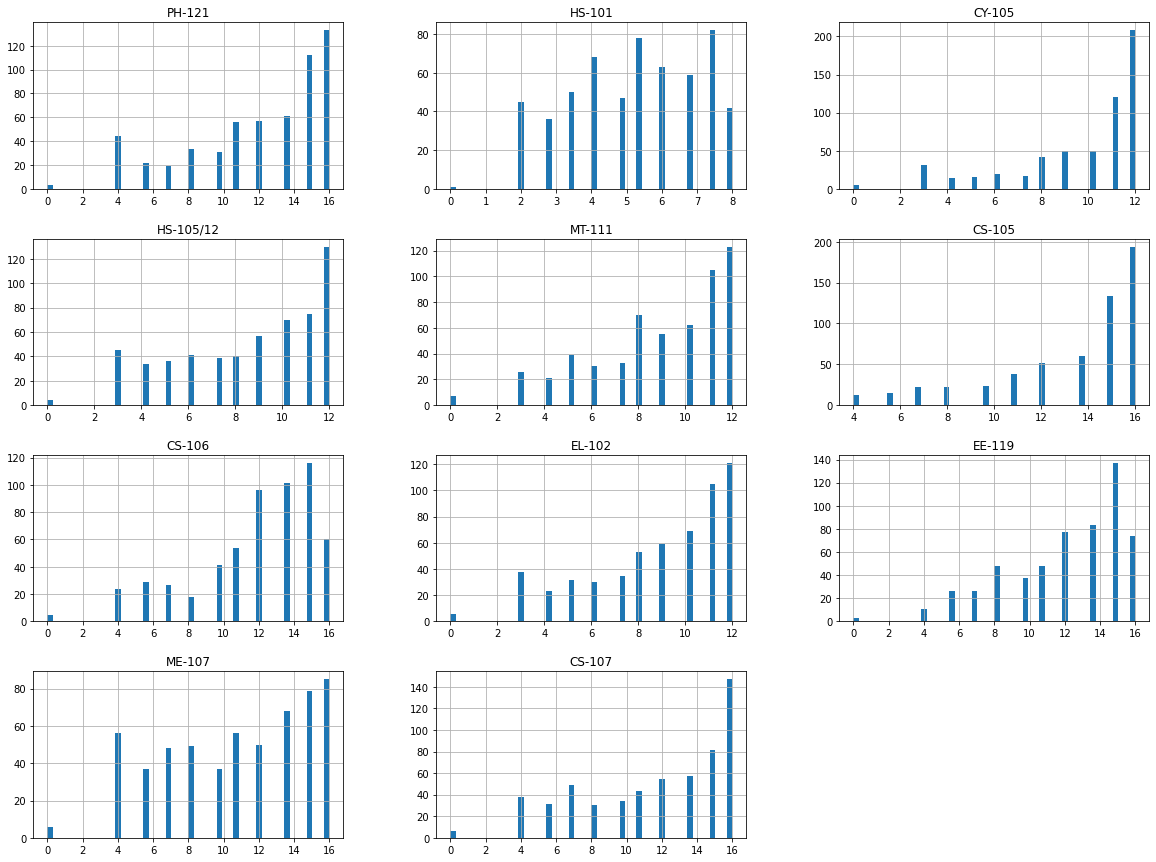

In [18]:
first_year.hist(bins=50, figsize=(20, 15)) #It shows each course's GPA effect on CGPA

### Linear Regression Model

In [19]:
Linear_Regression_Model_model_1=LinearRegression()#calling the function of algorithm

In [20]:
Linear_Regression_Model_model_1.fit(X_train,y_train) #Then fit on our train inputs and outputs

LinearRegression()

In [21]:
Predictions_of_Linear_Regression_model_1=Linear_Regression_Model_model_1.predict(X_test) #Try to predict(output) of test data
Predictions_of_Linear_Regression_model_1

array([2.15570089, 2.6040885 , 2.44416452, 2.5569436 , 2.71508732,
       2.74239317, 2.28199689, 3.67792819, 3.50252261, 3.14958035,
       2.18588652, 1.94949175, 2.93403893, 2.67517378, 2.61220838,
       3.15191812, 3.07867296, 3.58119985, 2.5295004 , 2.88475091,
       3.15164468, 2.58627888, 3.42873268, 2.99255728, 3.09211015,
       1.82162716, 2.34938002, 2.99989219, 3.422928  , 2.49903984,
       2.12955162, 2.83118238, 3.37948973, 3.82030162, 3.29989971,
       2.64191831, 3.68012419, 1.99835036, 2.65473628, 2.83849226,
       1.58663245, 3.6724553 , 2.99104609, 3.3924432 , 3.21035232,
       2.27094912, 2.72543046, 3.27553981, 3.57871126, 3.25527941,
       3.5267161 , 3.57214086, 2.18150608, 2.81644944, 2.77871867,
       3.01761725, 2.5646621 , 2.35537938, 3.80644112, 3.76096857,
       3.25768722, 2.97267403, 3.69090426, 2.8663193 , 1.99022491,
       3.63592215, 2.3236513 , 1.95486362, 3.18025373, 2.38402274,
       0.71534426, 1.39330626, 3.23876189, 2.19609406, 2.84540

In [22]:
#For training and testing accuracy
print("Accuracy on training set: {:.3f}".format(Linear_Regression_Model_model_1.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(Linear_Regression_Model_model_1.score(X_test,y_test)))

Accuracy on training set: 0.852
Accuracy on test set: 0.867


### Evaluating The Model

In [23]:
#calculate rmse to find error in model. Less rmse good model
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,Predictions_of_Linear_Regression_model_1)
rmse_of_Linear_Regression_1_model_1=np.sqrt(mse)
rmse_of_Linear_Regression_1_model_1

0.229575375924774

In [24]:
#Try cross validation to overcome overfitting if happens and then take rmse for every round in cross validation
from sklearn.model_selection import cross_val_score
cross_value_1=cross_val_score(Linear_Regression_Model_model_1, X_test,y_test,scoring="neg_mean_squared_error" ,cv=10)
rmse_of_Linear_Regression_model_1=np.sqrt(-cross_value_1)
rmse_of_Linear_Regression_model_1

array([0.16047647, 0.29686339, 0.29423568, 0.22535339, 0.25006308,
       0.27855932, 0.27863164, 0.28412677, 0.15034415, 0.15953221])

In [25]:
#calculate r^2 metric to find accuracy in model. More its value more better model
from sklearn.metrics import r2_score
r2_score1=r2_score(y_test,Predictions_of_Linear_Regression_model_1)
r2_score1

0.8671028748775789

### Random Forest

In [26]:
from sklearn.ensemble import RandomForestRegressor
Random_Forest_Model_model_1=RandomForestRegressor()#calling the function of algorithm

In [27]:
Random_Forest_Model_model_1.fit(X_train,y_train )#Then fit on our train inputs and outputs

RandomForestRegressor()

In [28]:
Predictions_of_Random_Forest_model_1=Random_Forest_Model_model_1.predict(X_test)#Try to predict(output) of test data
Predictions_of_Random_Forest_model_1

array([2.36978   , 2.40396   , 2.3739    , 2.46878   , 2.47395   ,
       2.88233   , 2.34691   , 3.63724   , 3.33362   , 3.18553   ,
       2.29984   , 1.96339   , 2.83127   , 2.68398   , 2.80224   ,
       3.03005   , 3.16551   , 3.60961   , 2.56572   , 2.85362   ,
       3.09396   , 2.35997   , 3.5051    , 2.78182   , 3.04256   ,
       1.92772   , 2.18448   , 2.86223   , 3.29211   , 2.45257   ,
       2.15165   , 2.88234   , 3.43814   , 3.90788833, 3.38026   ,
       2.98284   , 3.6607    , 2.09779   , 2.63426   , 2.81526   ,
       1.78833   , 3.687606  , 3.08104   , 3.26676   , 3.16584   ,
       2.06162   , 2.53552   , 3.27119   , 3.47975   , 3.4187    ,
       3.56872   , 3.65519   , 2.2999    , 3.05649   , 2.54566   ,
       3.0262    , 2.57367   , 2.30483   , 3.868305  , 3.849815  ,
       3.27242   , 2.87319   , 3.51136   , 2.82107   , 2.05708   ,
       3.62268   , 2.24085   , 2.2299    , 3.07376   , 2.30259   ,
       1.23271   , 1.53591   , 3.02795   , 2.15552   , 3.04621

In [29]:
#For training and testing accuracy
print("Accuracy on training set: {:.3f}".format(Random_Forest_Model_model_1.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(Random_Forest_Model_model_1.score(X_test,y_test)))

Accuracy on training set: 0.977
Accuracy on test set: 0.870


### Evaluating The Model

In [30]:
#calculate rmse to find error in model. Less rmse good model
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,Predictions_of_Random_Forest_model_1)
rmse_of_Random_Forest_1_model_1=np.sqrt(mse)
rmse_of_Random_Forest_1_model_1

0.2273183210020021

In [31]:
#Try cross validation to overcome overfitting if happens and then take rmse for every round in cross validation
from sklearn.model_selection import cross_val_score
cross_value_2=cross_val_score(Random_Forest_Model_model_1, X_test,y_test,scoring="neg_mean_squared_error" ,cv=10)
rmse_of_Random_Forest_model_1=np.sqrt(-cross_value_2)
rmse_of_Random_Forest_model_1

array([0.24894824, 0.29796692, 0.38745913, 0.2179979 , 0.31083448,
       0.31306477, 0.36166807, 0.21792373, 0.26872587, 0.16706381])

In [32]:
#calculate r^2 metric to find accuracy in model. More its value more better model
from sklearn.metrics import r2_score
r2_score2=r2_score(y_test,Predictions_of_Random_Forest_model_1)
r2_score2

0.8697031677885982

### Interface

In [33]:
pip install gradio

In [34]:
import gradio as gr

In [35]:
def CGPA_1st(PH_121 ,HS_101 ,CY_105 ,HS_105_12 ,MT_111 ,CS_105 ,CS_106 ,EL_102 ,EE_119 ,ME_107 ,CS_107):
    user_input_model_1=np.array([PH_121 ,HS_101 ,CY_105 ,HS_105_12 ,MT_111 ,CS_105 ,CS_106 ,EL_102 ,EE_119 ,ME_107 ,CS_107])#Take user input of grades for each course
    user_input_model_1=user_input_model_1.reshape(1,-1)#reshape it
    user_input_model_1=pd.DataFrame(user_input_model_1)#Then convert into dataframe beacuse our model make predictions on dataframe
    for i in range(0,11):
            user_input_model_1[i]=user_input_model_1[i].map(AssignGPs)#Assign grades with their respective GP points
    fourcd=[0,5,6,8,9,10]
    thirdcd=[2,3,4,7]
    secondcd=[1]
    for i in fourcd:
        user_input_model_1.iloc[:, i]=user_input_model_1.iloc[:, i]*4 #multiplying with respective credit_hour(4 credit hour)
    for i in thirdcd:
        user_input_model_1.iloc[:, i]=user_input_model_1.iloc[:, i]*3 #multiplying with respective credit_hour(3 credit hour)
    for i in secondcd:
        user_input_model_1.iloc[:, i]=user_input_model_1.iloc[:, i]*2 #multiplying with respective credit_hour(2 credit hour)
    user_predictions_model_1=Linear_Regression_Model_model_1.predict(user_input_model_1) #Make prediction or give predicted output
    return user_predictions_model_1

           



In [36]:
#Interface function
first_year_model=gr.Interface(CGPA_1st, inputs=["text","text","text","text","text","text","text","text","text","text","text"],
                       outputs="number",description="Predict CGPA Using First Year Marks Only And Please Write Grades in Uppercase letters")




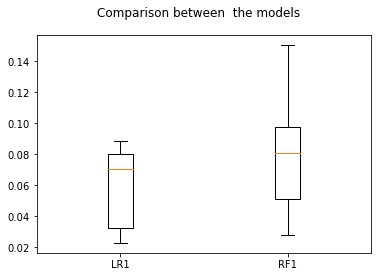

In [37]:
#For comparision between 2 models on basis of croos validation
results=[]
results.append(-cross_value_1)
results.append(-cross_value_2)
models=[('LR1',Linear_Regression_Model_model_1),('RF1',Random_Forest_Model_model_1) ]

scoring='accuracy'
names=[]
for name,model in models:
    names.append(name)
#Boxplot Algorithm Comparison
fig=plt.figure()
fig.suptitle('Comparison between  the models')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# MODEL 2 (USIGN  FIRST YEAR AND SECOND YEAR GPs)

In [38]:
second_year=courses.iloc[:, 0:22] #SEPARATING THE COURSES OF FIRST YEAR  AND SECOND YEAR FOR MODEL 2 from data

In [39]:
second_year.head()#PRINTS UPPER 5 ROWS IN THE DATA 

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,MT-222,EE-222,MT-224,CS-210,CS-211,CS-203,CS-214,EE-217,CS-212,CS-215
0,10.8,2.8,5.1,6.0,5.1,5.6,4.0,5.1,10.8,6.8,...,3.0,14.8,8.1,7.2,4.2,1.4,4.0,16.0,4.0,6.8
1,16.0,2.0,4.2,3.0,8.1,8.0,4.0,12.0,5.6,4.0,...,8.1,6.8,4.2,4.2,3.0,2.0,4.0,10.8,8.0,4.0
2,16.0,6.0,12.0,8.1,10.2,16.0,10.8,10.2,14.8,14.8,...,12.0,16.0,12.0,12.0,12.0,4.0,14.8,16.0,14.8,16.0
3,4.0,4.8,4.2,3.0,3.0,14.8,5.6,5.1,4.0,9.6,...,4.2,10.8,3.0,6.0,10.2,2.4,4.0,5.6,4.0,4.0
4,14.8,7.4,11.1,10.2,12.0,16.0,14.8,10.2,16.0,14.8,...,12.0,14.8,11.1,11.1,8.1,4.0,14.8,16.0,14.8,14.8


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(second_year,output,test_size=0.2) #SPLITTING THE DATASET INTO TRAINING AND TESTING PART



In [41]:
len(X_train)

456

In [42]:
len(X_test)

115

array([[<AxesSubplot:title={'center':'PH-121'}>,
        <AxesSubplot:title={'center':'HS-101'}>,
        <AxesSubplot:title={'center':'CY-105'}>,
        <AxesSubplot:title={'center':'HS-105/12'}>,
        <AxesSubplot:title={'center':'MT-111'}>],
       [<AxesSubplot:title={'center':'CS-105'}>,
        <AxesSubplot:title={'center':'CS-106'}>,
        <AxesSubplot:title={'center':'EL-102'}>,
        <AxesSubplot:title={'center':'EE-119'}>,
        <AxesSubplot:title={'center':'ME-107'}>],
       [<AxesSubplot:title={'center':'CS-107'}>,
        <AxesSubplot:title={'center':'HS-205/20'}>,
        <AxesSubplot:title={'center':'MT-222'}>,
        <AxesSubplot:title={'center':'EE-222'}>,
        <AxesSubplot:title={'center':'MT-224'}>],
       [<AxesSubplot:title={'center':'CS-210'}>,
        <AxesSubplot:title={'center':'CS-211'}>,
        <AxesSubplot:title={'center':'CS-203'}>,
        <AxesSubplot:title={'center':'CS-214'}>,
        <AxesSubplot:title={'center':'EE-217'}>],
       [<A

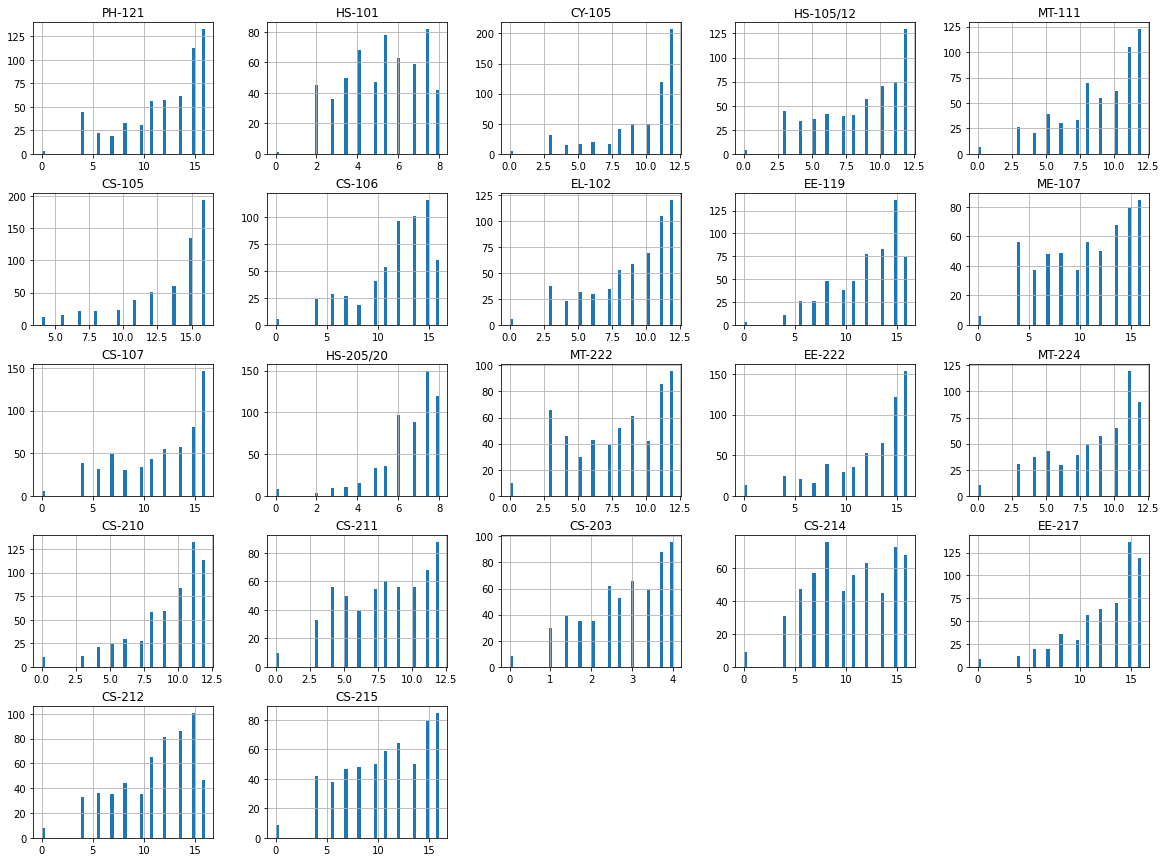

In [43]:
second_year.hist(bins=50, figsize=(20, 15)) #It shows each course's GPA effect on CGPA

### SVM Regressor

In [44]:
from sklearn.svm import SVR
Support_Vector_Regressor_Model_model_2=SVR(kernel='linear') #calling the function of algorithm we used linear kernel because data is linearly separable

In [45]:
Support_Vector_Regressor_Model_model_2.fit(X_train,y_train) #Then fit on our train inputs and outputs

SVR(kernel='linear')

In [46]:
Predictions_of_Support_Vector_Regressor_model_2=Support_Vector_Regressor_Model_model_2.predict(X_test) #Try to predict(output) of test data
Predictions_of_Support_Vector_Regressor_model_2

array([2.78065928, 2.66580992, 2.05408279, 1.95062822, 2.42484756,
       3.71970905, 2.25907319, 2.61941676, 3.23161138, 2.52011208,
       2.41655073, 3.15074764, 2.91794097, 2.74573631, 2.73844109,
       2.27880189, 2.76250378, 3.81087932, 2.71209866, 2.35871584,
       3.17603941, 2.0829449 , 3.13305264, 2.89829885, 3.81742413,
       2.17040706, 3.6130275 , 3.67910599, 2.51151663, 2.75792146,
       3.23929126, 3.39200703, 0.56622322, 3.81038572, 3.44860686,
       2.7990369 , 3.57435456, 3.3053694 , 3.77254237, 2.16531128,
       2.27070682, 3.52801865, 3.78757709, 2.08027778, 2.74109331,
       3.59732491, 3.25260176, 3.32941392, 3.68063045, 3.84046178,
       2.57049693, 2.94424371, 3.65478719, 3.5566246 , 3.50518842,
       3.69303152, 2.47202331, 2.84269275, 2.55410942, 1.97190977,
       3.18624333, 2.6262094 , 2.91683856, 2.22954165, 3.79126542,
       3.4877435 , 3.18247848, 1.98875365, 3.65452563, 3.54747946,
       3.30539454, 2.76182674, 2.948057  , 3.09486215, 2.99420

In [47]:
#For training and testing accuracy
print("Accuracy on training set: {:.3f}".format(Support_Vector_Regressor_Model_model_2.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(Support_Vector_Regressor_Model_model_2.score(X_test,y_test)))

Accuracy on training set: 0.904
Accuracy on test set: 0.947


### Evaluating The Model

In [48]:
#calculate rmse to find error in model . Less rmse good model
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,Predictions_of_Support_Vector_Regressor_model_2)
rmse_of_Support_Vector_Regressor_model_2=np.sqrt(mse)
rmse_of_Support_Vector_Regressor_model_2

0.1499311604004541

In [49]:
#Try cross validation to overcome overfitting if happens and then take rmse for every round in cross validation
from sklearn.model_selection import cross_val_score
cross_value_3=cross_val_score(Support_Vector_Regressor_Model_model_2, X_test,y_test,scoring="neg_mean_squared_error" ,cv=10)
rmse_of_Support_Vector_Regressor_model_2=np.sqrt(-cross_value_3)
rmse_of_Support_Vector_Regressor_model_2

array([0.15321953, 0.14336894, 0.1944888 , 0.08877642, 0.1964054 ,
       0.15397739, 0.13402555, 0.11015926, 0.12151655, 0.12494538])

In [50]:
#calculate r^2 metric to find accuracy in model. More its value more better model
from sklearn.metrics import r2_score
r2_score3=r2_score(y_test,Predictions_of_Support_Vector_Regressor_model_2)
r2_score3

0.9469602301544632

### KNN Regressor

In [51]:
from sklearn.neighbors import KNeighborsRegressor
#calling the function of algorithm and we used standard or more commonly used k value which is 5 because our dataset is not too large not 
KNeighborsRegressor_Model_model_2=KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)#Then fit on our train inputs and outputs

In [52]:
Predictions_of_KNeighborsRegressor_model_2=KNeighborsRegressor_Model_model_2.predict(X_test)#Try to predict(output) of test data
Predictions_of_KNeighborsRegressor_model_2

array([2.7596, 2.6736, 2.26  , 1.9074, 2.564 , 3.7764, 2.357 , 2.7596,
       3.3748, 2.6306, 2.4778, 2.986 , 2.9278, 2.8352, 2.6446, 2.3288,
       2.7024, 3.9546, 2.8904, 2.3854, 3.4474, 2.008 , 3.2002, 2.8838,
       3.9318, 2.244 , 3.7646, 3.7934, 2.5682, 3.0564, 3.2574, 3.458 ,
       1.1926, 3.9024, 3.6326, 2.8672, 3.5798, 3.3948, 3.8508, 2.299 ,
       2.13  , 3.5748, 3.8552, 1.8712, 2.8018, 3.6794, 3.3532, 3.4554,
       3.7266, 3.9238, 2.3544, 3.0598, 3.779 , 3.6338, 3.483 , 3.667 ,
       2.6532, 3.0706, 2.9782, 2.0098, 3.1456, 2.7278, 2.971 , 2.1488,
       3.9486, 3.6478, 3.3434, 1.7466, 3.74  , 3.5858, 3.3812, 2.753 ,
       2.9834, 2.9796, 3.0752, 2.744 , 3.8794, 2.158 , 3.3874, 3.6004,
       3.5226, 3.5928, 2.3502, 3.673 , 2.6458, 3.7868, 3.9592, 3.443 ,
       3.1604, 2.9466, 3.0872, 3.2584, 2.1806, 3.6642, 2.3448, 3.742 ,
       3.3282, 2.7242, 3.3616, 2.0354, 3.7768, 3.2418, 2.6298, 1.7372,
       3.42  , 1.8476, 3.611 , 2.983 , 2.2596, 3.1614, 2.2048, 3.0986,
      

In [53]:
#For training and testing accuracy
print("Accuracy on training set: {:.3f}".format(KNeighborsRegressor_Model_model_2.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(KNeighborsRegressor_Model_model_2.score(X_test,y_test)))

Accuracy on training set: 0.938
Accuracy on test set: 0.911


### Evaluating the model

In [54]:
#calculate rmse to find error in model . Less rmse good model
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,Predictions_of_KNeighborsRegressor_model_2)
rmse_of_KNeighborsRegressor_model_2=np.sqrt(mse)
rmse_of_KNeighborsRegressor_model_2

0.19462968002806275

In [55]:
#Try cross validation to overcome overfitting if happens and then take rmse for every round in cross validation
from sklearn.model_selection import cross_val_score
cross_value_4=cross_val_score(KNeighborsRegressor_Model_model_2, X_test,y_test,scoring="neg_mean_squared_error" ,cv=10)
rmse_of_KNeighborsRegressor_model_2=np.sqrt(-cross_value_4)
rmse_of_KNeighborsRegressor_model_2

array([0.22398385, 0.19858288, 0.36298607, 0.17313476, 0.20691025,
       0.2794531 , 0.18207738, 0.16801559, 0.20243131, 0.1509961 ])

In [56]:
#calculate r^2 metric to find accuracy in model. More its value more better model
from sklearn.metrics import r2_score
r2_score4=r2_score(y_test,Predictions_of_KNeighborsRegressor_model_2)
r2_score4

0.9106209027851582

### LINEAR REGRESSION(ONLY TO CHECK UNDERFITTING)

In [57]:
Linear_Regression_Model_model_2=LinearRegression()#calling the function of algorithm

In [58]:
Linear_Regression_Model_model_2.fit(X_train,y_train) #Then fit on our train inputs and outputs

LinearRegression()

In [59]:
Predictions_of_Linear_Regression_model_2=Linear_Regression_Model_model_2.predict(X_test) #Try to predict(output) of test data
Predictions_of_Linear_Regression_model_2

array([2.74235321, 2.66729591, 1.99948019, 2.03621987, 2.49339071,
       3.68027667, 2.24970045, 2.66461247, 3.23955937, 2.58133799,
       2.48563974, 3.11490825, 2.93115007, 2.8329878 , 2.77577606,
       2.2796276 , 2.87032592, 3.80057614, 2.84812519, 2.34946079,
       3.15631595, 2.31573904, 3.06929934, 2.89211129, 3.80426423,
       2.27468325, 3.60692809, 3.66163437, 2.53425917, 2.75306748,
       3.22042794, 3.30859693, 0.69429353, 3.78749046, 3.41241952,
       2.8244138 , 3.57618739, 3.25650468, 3.75380518, 2.17308319,
       2.25638742, 3.53178057, 3.77658797, 2.10983234, 2.69999992,
       3.53604991, 3.18969378, 3.33533609, 3.66840593, 3.86078079,
       2.5397572 , 2.94801243, 3.63345088, 3.55019577, 3.46796986,
       3.6449348 , 2.43377654, 2.87181294, 2.56490185, 1.97730485,
       3.20557657, 2.64319158, 2.94557881, 2.36422117, 3.75729011,
       3.472155  , 3.17186226, 1.97665918, 3.63897001, 3.51418134,
       3.30041827, 2.78007556, 2.95899651, 3.1714692 , 2.94026

In [60]:
#For training and testing accuracy
print("Accuracy on training set: {:.3f}".format(Linear_Regression_Model_model_2.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(Linear_Regression_Model_model_2.score(X_test,y_test)))

Accuracy on training set: 0.916
Accuracy on test set: 0.931


### Evaluating the Model

In [61]:
#calculate rmse to find error in model. Less rmse good model
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,Predictions_of_Linear_Regression_model_2)
rmse_of_Linear_Regression_1_model_2=np.sqrt(mse)
rmse_of_Linear_Regression_1_model_2

0.17059820439604534

In [62]:
#Try cross validation to overcome overfitting if happens and then take rmse for every round in cross validation
from sklearn.model_selection import cross_val_score
cross_value_1=cross_val_score(Linear_Regression_Model_model_2, X_test,y_test,scoring="neg_mean_squared_error" ,cv=10)
rmse_of_Linear_Regression_model_2=np.sqrt(-cross_value_1)
rmse_of_Linear_Regression_model_2

array([0.1691127 , 0.15494442, 0.20892479, 0.10417779, 0.20383119,
       0.17037059, 0.13405444, 0.11313968, 0.10582977, 0.11283979])

In [63]:
#calculate r^2 metric to find accuracy in model. More its value more better model
from sklearn.metrics import r2_score
r2_score7=r2_score(y_test,Predictions_of_Linear_Regression_model_2)
r2_score7

0.9313300489384985

### Interface

In [64]:
def CGPA_2nd(PH_121 ,HS_101 ,CY_105 ,HS_105_12 ,MT_111 ,CS_105 ,CS_106 ,EL_102 ,EE_119 ,ME_107 ,CS_107, HS_205_20 ,MT_222 ,EE_222 ,MT_224 ,CS_210 ,CS_211 ,CS_203 ,CS_214 ,EE_217 ,CS_212 ,CS_215 
):
    user_input_model_2=np.array([PH_121 ,HS_101 ,CY_105 ,HS_105_12 ,MT_111 ,CS_105 ,CS_106 ,EL_102 ,EE_119 ,ME_107 ,CS_107,HS_205_20 ,MT_222 ,EE_222 ,MT_224 ,CS_210 ,CS_211 ,CS_203 ,CS_214 ,EE_217 ,CS_212 ,CS_215]) #Take user input of grades for each course
    user_input_model_2=user_input_model_2.reshape(1,-1)#reshape it
    user_input_model_2=pd.DataFrame(user_input_model_2)#Then convert into dataframe beacuse our model make predictions on dataframe
    for i in range(0,22):
            user_input_model_2[i]=user_input_model_2[i].map(AssignGPs)#Assign grades with their respective GP points
    fourcd=[0,5,6,8,9,10,13,18,19,20,21]
    thirdcd=[2,3,4,7,12,14,15,16]
    secondcd=[1,11]
    onecd=[17]
    for i in fourcd:
        user_input_model_2.iloc[:, i]=user_input_model_2.iloc[:, i]*4 #multiplying with respective credit_hour(4 credit hour)
    for i in thirdcd:
        user_input_model_2.iloc[:, i]=user_input_model_2.iloc[:, i]*3 #multiplying with respective credit_hour(3 credit hour)
    for i in secondcd:
        user_input_model_2.iloc[:, i]=user_input_model_2.iloc[:, i]*2 #multiplying with respective credit_hour(2 credit hour)
    user_predictions_model_2=KNeighborsRegressor_Model_model_2.predict(user_input_model_2)#Make prediction or give predicted output
    return user_predictions_model_2

           
 


In [65]:
#Interface function
second_year_model=gr.Interface(CGPA_2nd, inputs=["text","text","text","text","text","text","text","text","text","text","text","text","text","text","text","text","text","text","text","text","text","text"],
                       outputs="number",description="Predict CGPA Using First Year And Second Year Marks And Please Write Grades in Uppercase letters")




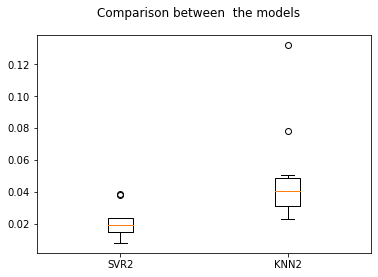

In [66]:
#For comparision between 2 models on basis of cross validation
results=[]
results.append(-cross_value_3)
results.append(-cross_value_4)
models=[('SVR2',Support_Vector_Regressor_Model_model_2),('KNN2',KNeighborsRegressor_Model_model_2)]
scoring='accuracy'
names=[]
for name,model in models:
    names.append(name)
#Boxplot Algorithm Comparison
fig=plt.figure()
fig.suptitle('Comparison between  the models')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# MODEL 3 (USIGN  FIRST YEAR , SECOND YEAR AND THIRD YEAR GPs)

In [67]:
courses.rename(columns = {'MT-442':'MT_442'}, inplace = True)
column_to_move=courses.pop("MT_442")
courses.insert(33, "MT_442", column_to_move)#There is a course of fourth year in third year data so we move it
third_year=courses.iloc[:, 0:33] #SEPARATING THE COURSES OF FIRST YEAR, SECOND YEAR AND THIRD YEAR FOR MODEL 3 from data

In [68]:
third_year.head()#PRINTS UPPER 5 ROWS IN THE DATA 

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,EF-303,HS-304,CS-301,CS-302,TC-383,EL-332,CS-318,CS-306,CS-312,CS-317
0,10.8,2.8,5.1,6.0,5.1,5.6,4.0,5.1,10.8,6.8,...,5.1,4.8,12.0,6.0,4.8,4.0,6.8,8.0,5.1,5.1
1,16.0,2.0,4.2,3.0,8.1,8.0,4.0,12.0,5.6,4.0,...,3.0,3.4,14.8,4.2,3.4,4.0,14.8,4.0,4.2,3.0
2,16.0,6.0,12.0,8.1,10.2,16.0,10.8,10.2,14.8,14.8,...,7.2,8.0,13.6,11.1,6.0,6.8,14.8,14.8,9.0,9.0
3,4.0,4.8,4.2,3.0,3.0,14.8,5.6,5.1,4.0,9.6,...,3.0,5.4,4.0,8.1,2.8,2.8,13.6,6.8,4.2,6.0
4,14.8,7.4,11.1,10.2,12.0,16.0,14.8,10.2,16.0,14.8,...,5.1,7.4,10.8,11.1,4.8,7.4,10.8,14.8,8.1,10.2


In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(third_year,output,test_size=0.2) #SPLITTING THE DATASET INTO TRAINING AND TESTING PART


In [70]:
len(X_train)

456

In [71]:
len(X_test)

115

array([[<AxesSubplot:title={'center':'PH-121'}>,
        <AxesSubplot:title={'center':'HS-101'}>,
        <AxesSubplot:title={'center':'CY-105'}>,
        <AxesSubplot:title={'center':'HS-105/12'}>,
        <AxesSubplot:title={'center':'MT-111'}>,
        <AxesSubplot:title={'center':'CS-105'}>],
       [<AxesSubplot:title={'center':'CS-106'}>,
        <AxesSubplot:title={'center':'EL-102'}>,
        <AxesSubplot:title={'center':'EE-119'}>,
        <AxesSubplot:title={'center':'ME-107'}>,
        <AxesSubplot:title={'center':'CS-107'}>,
        <AxesSubplot:title={'center':'HS-205/20'}>],
       [<AxesSubplot:title={'center':'MT-222'}>,
        <AxesSubplot:title={'center':'EE-222'}>,
        <AxesSubplot:title={'center':'MT-224'}>,
        <AxesSubplot:title={'center':'CS-210'}>,
        <AxesSubplot:title={'center':'CS-211'}>,
        <AxesSubplot:title={'center':'CS-203'}>],
       [<AxesSubplot:title={'center':'CS-214'}>,
        <AxesSubplot:title={'center':'EE-217'}>,
        <Ax

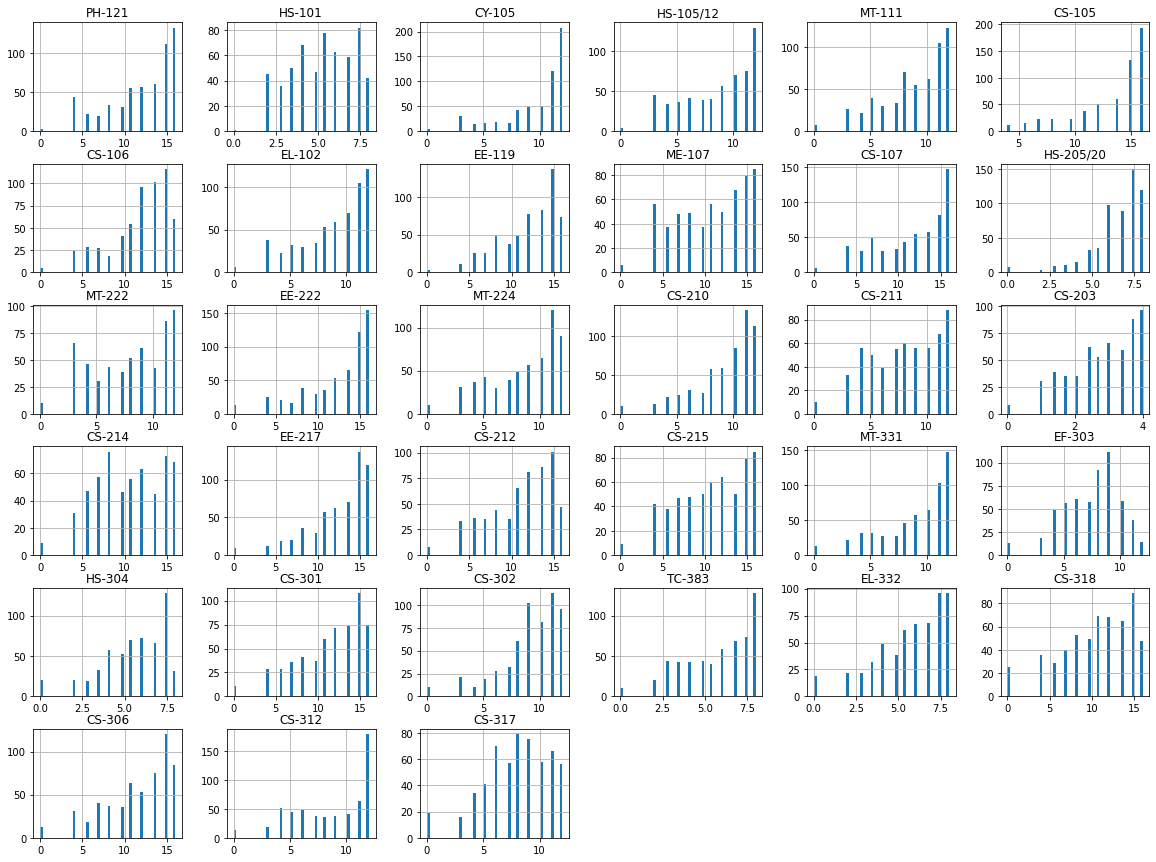

In [72]:
third_year.hist(bins=50, figsize=(20, 15))#It shows each course's GPA effect on CGPA

### Random Forest

In [73]:
from sklearn.ensemble import RandomForestRegressor
Random_Forest_Model_model_3=RandomForestRegressor()#calling the function of algorithm

In [74]:
Random_Forest_Model_model_3.fit(X_train,y_train) #Then fit on our train inputs and outputs

RandomForestRegressor()

In [75]:
Predictions_of_Random_Forest_model_3=Random_Forest_Model_model_3.predict(X_test) #Try to predict(output) of test data
Predictions_of_Random_Forest_model_3


array([2.17672, 3.63215, 2.92088, 2.48031, 2.98181, 3.3903 , 2.77971,
       2.98629, 3.25624, 3.1326 , 3.4135 , 3.4874 , 3.0874 , 3.90962,
       2.4793 , 3.40454, 2.66117, 3.04971, 2.39917, 2.18611, 2.11687,
       3.79556, 3.29045, 2.10646, 2.57661, 2.50038, 2.88473, 2.54857,
       3.76884, 2.39751, 1.96232, 3.65807, 2.0105 , 3.10535, 2.98282,
       3.20554, 1.93913, 2.13644, 3.31453, 2.04758, 3.18542, 2.72768,
       2.94877, 2.45826, 2.55793, 1.63915, 2.81503, 3.46322, 3.49751,
       2.52818, 3.52816, 2.69858, 3.59949, 2.15001, 3.32976, 2.52984,
       2.66978, 3.3053 , 2.07674, 2.23258, 3.24101, 2.69651, 3.78846,
       3.00331, 3.1341 , 2.88095, 2.5915 , 2.09675, 2.72   , 3.29753,
       2.18537, 3.57041, 3.58271, 3.47553, 2.77182, 2.14013, 3.56967,
       3.34996, 2.5748 , 3.14245, 3.719  , 2.10761, 3.01015, 3.54011,
       2.44048, 2.58736, 2.7642 , 2.70821, 3.84403, 2.91755, 2.41384,
       3.39572, 3.72717, 3.80793, 3.68701, 2.83276, 3.33292, 3.172  ,
       3.60657, 3.02

In [76]:
#For training and testing accuracy
print("Accuracy on training set: {:.3f}".format(Random_Forest_Model_model_3.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(Random_Forest_Model_model_3.score(X_test,y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.954


### Evaluating The Model

In [77]:
#calculate rmse to find error in model . Less rmse good model
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,Predictions_of_Random_Forest_model_3)
rmse_of_Random_Forest_1_model_3=np.sqrt(mse)
rmse_of_Random_Forest_1_model_3

0.13226545778980933

In [78]:
#Try cross validation to overcome overfitting if happens and then take rmse for every round in cross validation
from sklearn.model_selection import cross_val_score
cross_value_5=cross_val_score(Random_Forest_Model_model_3, X_test,y_test,scoring="neg_mean_squared_error" ,cv=10)
rmse_of_Random_Forest_model_3=np.sqrt(-cross_value_5)
rmse_of_Random_Forest_model_3

array([0.12482944, 0.34000503, 0.13596299, 0.29946578, 0.11417308,
       0.12870493, 0.18230749, 0.18010538, 0.11951588, 0.10142248])

In [79]:
#calculate r^2 metric to find accuracy in model. More its value more better model

from sklearn.metrics import r2_score
r2_score5=r2_score(y_test,Predictions_of_Random_Forest_model_3)
r2_score5

0.9538271105500412

### Decision Tree Regressor

In [80]:
from sklearn.tree import DecisionTreeRegressor
Decision_Tree_Model_model_3=DecisionTreeRegressor()#calling the function of algorithm

In [81]:
Decision_Tree_Model_model_3.fit(X_train,y_train) #Then fit on our train inputs and outputs

DecisionTreeRegressor()

In [82]:
Predictions_of_Decision_Tree_model_3=Decision_Tree_Model_model_3.predict(X_test)#Try to predict(output) of test data
Predictions_of_Decision_Tree_model_3

array([2.011, 3.668, 3.184, 2.512, 3.137, 3.555, 2.822, 2.736, 3.058,
       3.071, 3.664, 3.442, 3.172, 3.925, 2.602, 3.442, 2.208, 3.099,
       2.655, 2.579, 2.042, 3.772, 3.366, 1.38 , 2.793, 2.129, 3.363,
       2.701, 3.919, 2.574, 1.763, 3.452, 2.042, 2.763, 3.247, 3.058,
       1.805, 1.992, 3.176, 2.003, 3.071, 2.854, 3.019, 2.264, 2.792,
       1.38 , 2.763, 3.586, 3.335, 3.014, 3.624, 2.704, 3.648, 1.993,
       3.47 , 2.129, 2.8  , 3.443, 2.188, 2.552, 3.226, 2.191, 3.741,
       2.87 , 2.779, 2.208, 2.378, 1.899, 2.704, 3.442, 2.773, 3.395,
       3.485, 3.648, 2.918, 2.254, 3.759, 3.369, 2.636, 3.247, 3.723,
       2.053, 2.736, 3.5  , 2.478, 2.607, 2.737, 2.603, 3.925, 2.559,
       2.525, 3.452, 3.679, 3.908, 3.737, 2.821, 2.995, 3.259, 3.554,
       2.736, 3.06 , 3.29 , 3.395, 3.458, 2.612, 3.058, 2.634, 2.086,
       2.711, 1.949, 2.011, 3.769, 2.737, 2.343, 3.395])

In [83]:
#For training and testing accuracy
print("Accuracy on training set: {:.3f}".format(Decision_Tree_Model_model_3.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(Decision_Tree_Model_model_3.score(X_test,y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.814


### Evaluating The Model

In [84]:
#calculate rmse to find error in model . Less rmse good model
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,Predictions_of_Decision_Tree_model_3)
rmse_of_Decision_Tree_1_model_3=np.sqrt(mse)
rmse_of_Decision_Tree_1_model_3

0.26550883060726016

In [85]:
#Try cross validation to overcome overfitting if happens and then take rmse for every round in cross validation
from sklearn.model_selection import cross_val_score
cross_value_6=cross_val_score(Decision_Tree_Model_model_3, X_test,y_test,scoring="neg_mean_squared_error" ,cv=10)
rmse_of_Decision_Tree_model_3=np.sqrt(-cross_value_6)
rmse_of_Decision_Tree_model_3

array([0.31165833, 0.53168804, 0.34344019, 0.38310377, 0.57447512,
       0.18710959, 0.27593725, 0.27550087, 0.1930285 , 0.37284606])

In [86]:
#calculate r^2 metric to find accuracy in model. More its value more better model
from sklearn.metrics import r2_score
r2_score6=r2_score6=r2_score(y_test,Predictions_of_Decision_Tree_model_3)
r2_score6

0.8139403866524814

### LINEAR REGRESSION(ONLY TO CHECK UNDERFITTING)

In [87]:
Linear_Regression_Model_model_3=LinearRegression()#calling the function of algorithm

In [88]:
Linear_Regression_Model_model_3.fit(X_train,y_train) #Then fit on our train inputs and outputs

LinearRegression()

In [89]:
Predictions_of_Linear_Regression_model_3=Linear_Regression_Model_model_3.predict(X_test) #Try to predict(output) of test data
Predictions_of_Linear_Regression_model_3

array([2.13797979, 3.5575496 , 2.93461249, 2.44606083, 2.90234149,
       3.38772893, 2.65418992, 2.95308346, 2.9442037 , 3.26503288,
       3.39227879, 3.42081814, 3.26878784, 3.86189891, 2.47479221,
       3.51380815, 2.44197596, 3.10304632, 2.23120807, 1.90158657,
       2.2590658 , 3.79533743, 3.4852383 , 1.60002817, 2.7136226 ,
       2.41757667, 2.85810422, 2.47603477, 3.69738012, 2.38235625,
       1.97794333, 3.75890357, 1.84763342, 3.194094  , 3.08949152,
       3.27709877, 1.86674422, 2.14297836, 3.26126537, 1.94135183,
       3.15376077, 2.79814099, 2.91927726, 2.18862608, 2.62204663,
       1.32448015, 2.81094068, 3.48105339, 3.34542548, 2.51916252,
       3.50836018, 2.67854709, 3.73013071, 2.18451072, 3.35909304,
       2.64665263, 2.5026701 , 3.30573231, 1.92468138, 2.24507241,
       3.18353045, 2.75493269, 3.63583076, 2.7753581 , 3.02784084,
       3.07353386, 2.68624085, 2.11065111, 2.71702294, 3.34848479,
       2.27406427, 3.54196194, 3.63017751, 3.38356931, 2.75202

In [90]:
#For training and testing accuracy
print("Accuracy on training set: {:.3f}".format(Linear_Regression_Model_model_3.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(Linear_Regression_Model_model_3.score(X_test,y_test)))

Accuracy on training set: 0.953
Accuracy on test set: 0.938


### Evaluating the Model

In [91]:
#calculate rmse to find error in model. Less rmse good model
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,Predictions_of_Linear_Regression_model_3)
rmse_of_Linear_Regression_1_model_3=np.sqrt(mse)
rmse_of_Linear_Regression_1_model_3

0.15311272655223418

In [92]:
#Try cross validation to overcome overfitting if happens and then take rmse for every round in cross validation
from sklearn.model_selection import cross_val_score
cross_value_1=cross_val_score(Linear_Regression_Model_model_3, X_test,y_test,scoring="neg_mean_squared_error" ,cv=10)
rmse_of_Linear_Regression_model_3=np.sqrt(-cross_value_1)
rmse_of_Linear_Regression_model_3

array([0.10741166, 0.49020983, 0.20183519, 0.27533806, 0.13166644,
       0.1487934 , 0.16198075, 0.16528286, 0.0955069 , 0.10178395])

In [93]:
#calculate r^2 metric to find accuracy in model. More its value more better model
from sklearn.metrics import r2_score
r2_score8=r2_score(y_test,Predictions_of_Linear_Regression_model_3)
r2_score8

0.9381247801936348

### Interface

In [94]:
def CGPA_3rd(PH_121 ,HS_101 ,CY_105 ,HS_105_12 ,MT_111 ,CS_105 ,CS_106 ,EL_102 ,EE_119 ,ME_107 ,CS_107, 
             HS_205_20 ,MT_222 ,EE_222 ,MT_224 ,CS_210 ,CS_211 ,CS_203 ,CS_214 ,EE_217 ,CS_212 ,CS_215,
             MT_331 ,EF_303 ,HS_304 ,CS_301 ,CS_302 ,TC_383  ,EL_332,CS_318 ,CS_306 ,CS_312 ,CS_317):
    user_input_model_3=np.array([PH_121 ,HS_101 ,CY_105 ,HS_105_12 ,MT_111 ,CS_105 ,CS_106 ,EL_102 ,EE_119 ,ME_107 ,CS_107,HS_205_20 ,MT_222 ,EE_222 ,MT_224 ,CS_210 ,CS_211 ,CS_203 ,CS_214 ,EE_217 ,CS_212 ,CS_215,MT_331 ,EF_303 ,HS_304 ,CS_301 ,CS_302 ,TC_383  ,EL_332,CS_318 ,CS_306 ,CS_312 ,CS_317 ]) #Take user input of grades for each course
    user_input_model_3=user_input_model_3.reshape(1,-1)#reshape it
    user_input_model_3=pd.DataFrame(user_input_model_3)#Then convert into dataframe beacuse our model make predictions on dataframe
    for i in range(0,33):
            user_input_model_3[i]=user_input_model_3[i].map(AssignGPs)#Assign grades with their respective GP points
    fourcd=[0,5,6,8,9,10,13,18,19,20,21,25,30,31]
    thirdcd=[2,3,4,7,12,14,15,16,22,23,26,28,32]
    secondcd=[1,11,24,27,29]
    onecd=[17]
    for i in fourcd:
        user_input_model_3.iloc[:, i]=user_input_model_3.iloc[:, i]*4 #multiplying with respective credit_hour(4 credit hour)
    for i in thirdcd:
        user_input_model_3.iloc[:, i]=user_input_model_3.iloc[:, i]*3 #multiplying with respective credit_hour(3 credit hour)
    for i in secondcd:
        user_input_model_3.iloc[:, i]=user_input_model_3.iloc[:, i]*2 #multiplying with respective credit_hour(2 credit hour)
    user_predictions_model_3=Random_Forest_Model_model_3.predict(user_input_model_3)#Make prediction or give predicted output
    return user_predictions_model_3

           
 


In [95]:
#Interface function
third_year_model=gr.Interface(CGPA_3rd, inputs=["text","text","text","text","text","text","text","text","text","text","text","text","text","text","text","text","text","text","text","text","text","text", "text","text","text","text","text","text","text","text","text","text","text"],
                       outputs="number",description="Predict CGPA Using First Year ,Second Year And Third Year Marks And Please Write Grades in Uppercase letters")




In [96]:
#combining all interfaces
Final_Model = gr.TabbedInterface([first_year_model, second_year_model,third_year_model], ["First_Year_Model", "Second_Year_Model", "Third_Year_Model"])



In [97]:
Final_Model.launch() #launch interface

Running on local URL:  http://127.0.0.1:7860/

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x2634d1eab20>, 'http://127.0.0.1:7860/', None)

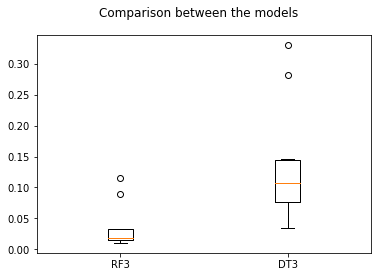

In [98]:
#For comparision between 2 models on basis of cross validation
results=[]
results.append(-cross_value_5)
results.append(-cross_value_6)
models=[('RF3',Random_Forest_Model_model_3),('DT3',Decision_Tree_Model_model_3)]
scoring='accuracy'
names=[]
for name,model in models:
    names.append(name)
#Boxplot Algorithm Comparison
fig=plt.figure()
fig.suptitle('Comparison between the models')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Graphical Comparison of all Models

In [99]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import KFold

In [100]:
results=[]
results.append(-cross_value_1)
results.append(-cross_value_2)
results.append(-cross_value_3)
results.append(-cross_value_4)
results.append(-cross_value_5)
results.append(-cross_value_6)
results

[array([0.01153726, 0.24030567, 0.04073744, 0.07581104, 0.01733605,
        0.02213947, 0.02623776, 0.02731842, 0.00912157, 0.01035997]),
 array([0.06197523, 0.08878428, 0.15012458, 0.04752308, 0.09661808,
        0.09800955, 0.13080379, 0.04749075, 0.07221359, 0.02791032]),
 array([0.02347622, 0.02055465, 0.03782589, 0.00788125, 0.03857508,
        0.02370904, 0.01796285, 0.01213506, 0.01476627, 0.01561135]),
 array([0.05016877, 0.03943516, 0.13175889, 0.02997565, 0.04281185,
        0.07809404, 0.03315217, 0.02822924, 0.04097844, 0.02279982]),
 array([0.01558239, 0.11560342, 0.01848593, 0.08967976, 0.01303549,
        0.01656496, 0.03323602, 0.03243795, 0.01428405, 0.01028652]),
 array([0.09713092, 0.28269217, 0.11795117, 0.1467685 , 0.33002167,
        0.03501   , 0.07614136, 0.07590073, 0.03726   , 0.13901418])]

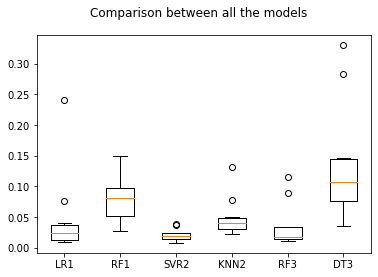

In [101]:
#Comparision between all models on basis of cross_validation
models=[('LR1',Linear_Regression_Model_model_1),('RF1',Random_Forest_Model_model_1),('SVR2',Support_Vector_Regressor_Model_model_2),('KNN2',KNeighborsRegressor_Model_model_2),('RF3',Random_Forest_Model_model_3),('DT3',Decision_Tree_Model_model_3)]
scoring='accuracy'
names=[]
for name,model in models:
    names.append(name)
#Boxplot Algorithm Comparison
fig=plt.figure()
fig.suptitle('Comparison between all the models')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()